# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read-in Data

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Exploratory Data Analysis

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

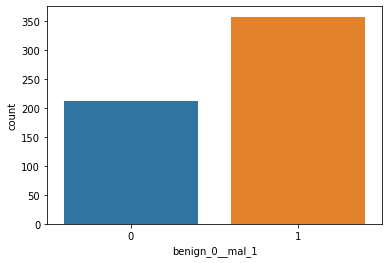

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

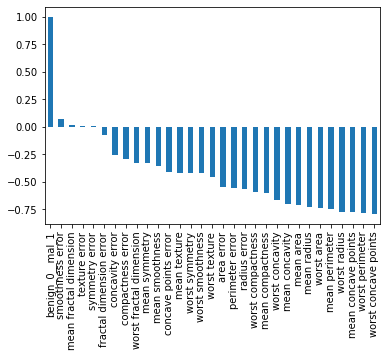

In [7]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False).plot(kind='bar')

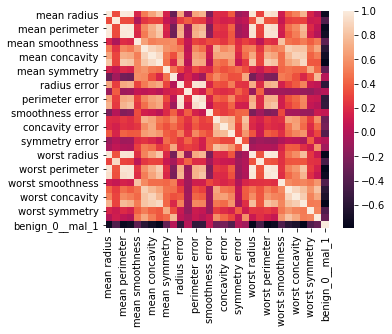

In [8]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr())

# Train-Test Split and Scaling

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
X_train.shape

(398, 30)

In [16]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 3ms/sample - loss: 0.6863 - val_loss: 0.6667
Epoch 2/600
398/398 [==============================] - 0s 174us/sample - loss: 0.6605 - val_loss: 0.6426
Epoch 3/600
398/398 [==============================] - 0s 365us/sample - loss: 0.6370 - val_loss: 0.6138
Epoch 4/600
398/398 [==============================] - 0s 158us/sample - loss: 0.6082 - val_loss: 0.5771
Epoch 5/600
398/398 [==============================] - 0s 159us/sample - loss: 0.5701 - val_loss: 0.5297
Epoch 6/600
398/398 [==============================] - 0s 159us/sample - loss: 0.5225 - val_loss: 0.4764
Epoch 7/600
398/398 [==============================] - 0s 158us/sample - loss: 0.4749 - val_loss: 0.4273
Epoch 8/600
398/398 [==============================] - 0s 160us/sample - loss: 0.4301 - val_loss: 0.3837
Epoch 9/600
398/398 [==============================] - 0s 160us/sample - loss: 0.3876 - val_loss: 0.3460
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 216us/sample - loss: 0.0557 - val_loss: 0.0567
Epoch 79/600
398/398 [==============================] - 0s 208us/sample - loss: 0.0565 - val_loss: 0.0560
Epoch 80/600
398/398 [==============================] - 0s 200us/sample - loss: 0.0563 - val_loss: 0.0576
Epoch 81/600
398/398 [==============================] - 0s 212us/sample - loss: 0.0537 - val_loss: 0.0543
Epoch 82/600
398/398 [==============================] - 0s 203us/sample - loss: 0.0554 - val_loss: 0.0541
Epoch 83/600
398/398 [==============================] - 0s 211us/sample - loss: 0.0536 - val_loss: 0.0545
Epoch 84/600
398/398 [==============================] - 0s 179us/sample - loss: 0.0527 - val_loss: 0.0569
Epoch 85/600
398/398 [==============================] - 0s 195us/sample - loss: 0.0557 - val_loss: 0.0548
Epoch 86/600
398/398 [==============================] - 0s 183us/sample - loss: 0.0568 - val_loss: 0.0550
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 150us/sample - loss: 0.0366 - val_loss: 0.0509
Epoch 156/600
398/398 [==============================] - 0s 149us/sample - loss: 0.0365 - val_loss: 0.0500
Epoch 157/600
398/398 [==============================] - 0s 156us/sample - loss: 0.0361 - val_loss: 0.0502
Epoch 158/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0355 - val_loss: 0.0509
Epoch 159/600
398/398 [==============================] - 0s 150us/sample - loss: 0.0356 - val_loss: 0.0506
Epoch 160/600
398/398 [==============================] - 0s 152us/sample - loss: 0.0390 - val_loss: 0.0513
Epoch 161/600
398/398 [==============================] - 0s 160us/sample - loss: 0.0390 - val_loss: 0.0517
Epoch 162/600
398/398 [==============================] - 0s 177us/sample - loss: 0.0376 - val_loss: 0.0497
Epoch 163/600
398/398 [==============================] - 0s 164us/sample - loss: 0.0377 - val_loss: 0.0500
Epoch 164/600
398/398 [==============

398/398 [==============================] - 0s 150us/sample - loss: 0.0145 - val_loss: 0.0648
Epoch 308/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0153 - val_loss: 0.0760
Epoch 309/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0145 - val_loss: 0.0652
Epoch 310/600
398/398 [==============================] - 0s 154us/sample - loss: 0.0143 - val_loss: 0.0811
Epoch 311/600
398/398 [==============================] - 0s 152us/sample - loss: 0.0134 - val_loss: 0.0707
Epoch 312/600
398/398 [==============================] - 0s 151us/sample - loss: 0.0140 - val_loss: 0.0719
Epoch 313/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0135 - val_loss: 0.0730
Epoch 314/600
398/398 [==============================] - 0s 150us/sample - loss: 0.0138 - val_loss: 0.0701
Epoch 315/600
398/398 [==============================] - 0s 149us/sample - loss: 0.0151 - val_loss: 0.0939
Epoch 316/600
398/398 [============================

398/398 [==============================] - 0s 153us/sample - loss: 0.0054 - val_loss: 0.1077
Epoch 460/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0056 - val_loss: 0.1194
Epoch 461/600
398/398 [==============================] - 0s 154us/sample - loss: 0.0047 - val_loss: 0.1073
Epoch 462/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0061 - val_loss: 0.1201
Epoch 463/600
398/398 [==============================] - 0s 157us/sample - loss: 0.0045 - val_loss: 0.1135
Epoch 464/600
398/398 [==============================] - 0s 154us/sample - loss: 0.0046 - val_loss: 0.1245
Epoch 465/600
398/398 [==============================] - 0s 152us/sample - loss: 0.0046 - val_loss: 0.1122
Epoch 466/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0048 - val_loss: 0.1198
Epoch 467/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0052 - val_loss: 0.1128
Epoch 468/600
398/398 [============================

In [19]:
losses = pd.DataFrame(model.history.history)

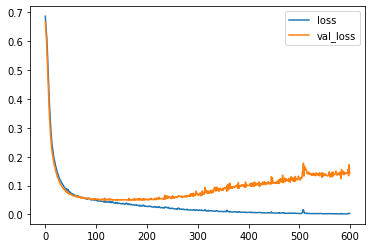

In [20]:
losses.plot()

- Note: This is a perfect example of **overfitting** as our training error continuously declined but validation error started to increase after certain epoches.

## Avoiding Overfitting using Early Stopping Callbacks

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.6672 - val_loss: 0.6421
Epoch 2/600
398/398 [==============================] - 0s 163us/sample - loss: 0.6344 - val_loss: 0.6052
Epoch 3/600
398/398 [==============================] - 0s 163us/sample - loss: 0.5983 - val_loss: 0.5638
Epoch 4/600
398/398 [==============================] - 0s 165us/sample - loss: 0.5584 - val_loss: 0.5190
Epoch 5/600
398/398 [==============================] - 0s 166us/sample - loss: 0.5165 - val_loss: 0.4756
Epoch 6/600
398/398 [==============================] - 0s 161us/sample - loss: 0.4773 - val_loss: 0.4314
Epoch 7/600
398/398 [==============================] - 0s 162us/sample - loss: 0.4307 - val_loss: 0.3917
Epoch 8/600
398/398 [==============================] - 0s 157us/sample - loss: 0.3943 - val_loss: 0.3534
Epoch 9/600
398/398 [==============================] - 0s 159us/sample - loss: 0.3600 - val_loss: 0.3200
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 172us/sample - loss: 0.0540 - val_loss: 0.0551
Epoch 79/600
398/398 [==============================] - 0s 196us/sample - loss: 0.0531 - val_loss: 0.0552
Epoch 80/600
398/398 [==============================] - 0s 183us/sample - loss: 0.0525 - val_loss: 0.0539
Epoch 81/600
398/398 [==============================] - 0s 185us/sample - loss: 0.0516 - val_loss: 0.0550
Epoch 82/600
398/398 [==============================] - 0s 176us/sample - loss: 0.0517 - val_loss: 0.0544
Epoch 83/600
398/398 [==============================] - 0s 169us/sample - loss: 0.0517 - val_loss: 0.0540
Epoch 84/600
398/398 [==============================] - 0s 176us/sample - loss: 0.0512 - val_loss: 0.0546
Epoch 85/600
398/398 [==============================] - 0s 190us/sample - loss: 0.0510 - val_loss: 0.0537
Epoch 86/600
398/398 [==============================] - 0s 176us/sample - loss: 0.0503 - val_loss: 0.0524
Epoch 87/600
398/398 [========================

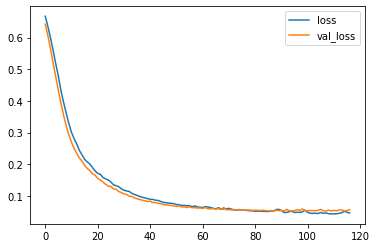

In [26]:
losses_earlyStop = pd.DataFrame(model.history.history)
losses_earlyStop.plot()

- Note: Now, with **Early Stopping**, the training stopped training before overfitting appeared.

## Avoiding Overfitting by adding Dropout Layers
- The Dropout layer will randomly turn off a portion of neurons (specified by `rate`) when training each batch to prevent overfitting.

In [27]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 3ms/sample - loss: 0.7454 - val_loss: 0.6693
Epoch 2/600
398/398 [==============================] - 0s 182us/sample - loss: 0.7011 - val_loss: 0.6568
Epoch 3/600
398/398 [==============================] - 0s 183us/sample - loss: 0.6661 - val_loss: 0.6376
Epoch 4/600
398/398 [==============================] - 0s 184us/sample - loss: 0.6728 - val_loss: 0.6166
Epoch 5/600
398/398 [==============================] - 0s 178us/sample - loss: 0.6451 - val_loss: 0.5920
Epoch 6/600
398/398 [==============================] - 0s 184us/sample - loss: 0.5926 - val_loss: 0.5647
Epoch 7/600
398/398 [==============================] - 0s 182us/sample - loss: 0.5972 - val_loss: 0.5342
Epoch 8/600
398/398 [==============================] - 0s 179us/sample - loss: 0.5659 - val_loss: 0.4994
Epoch 9/600
398/398 [==============================] - 0s 183us/sample - loss: 0.5377 - val_loss: 0.4684
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 166us/sample - loss: 0.1467 - val_loss: 0.0653
Epoch 79/600
398/398 [==============================] - 0s 168us/sample - loss: 0.1336 - val_loss: 0.0592
Epoch 80/600
398/398 [==============================] - 0s 167us/sample - loss: 0.1300 - val_loss: 0.0597
Epoch 81/600
398/398 [==============================] - 0s 175us/sample - loss: 0.1179 - val_loss: 0.0592
Epoch 82/600
398/398 [==============================] - 0s 166us/sample - loss: 0.1357 - val_loss: 0.0596
Epoch 83/600
398/398 [==============================] - 0s 166us/sample - loss: 0.1223 - val_loss: 0.0669
Epoch 84/600
398/398 [==============================] - 0s 167us/sample - loss: 0.1228 - val_loss: 0.0598
Epoch 85/600
398/398 [==============================] - 0s 167us/sample - loss: 0.1102 - val_loss: 0.0557
Epoch 86/600
398/398 [==============================] - 0s 170us/sample - loss: 0.1237 - val_loss: 0.0561
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 166us/sample - loss: 0.0663 - val_loss: 0.0505
Epoch 00155: early stopping


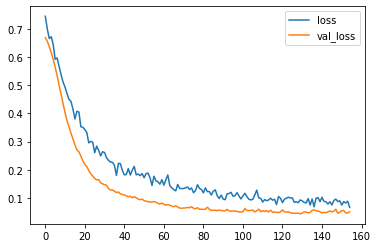

In [30]:
losses_earlyStop_DropOut = pd.DataFrame(model.history.history)
losses_earlyStop_DropOut.plot()

- Note: This is even better as both the training loss and validation loss were consistently going down and coverged to the same level.

# Evaluating the Model

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [34]:
print(confusion_matrix(y_test, predictions))

[[ 62   1]
 [  2 106]]
